In [1]:
import itertools as it

import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm
import seaborn as sns

sns.set()

In [2]:
def make_regression(func, n_elements, noise=0.0, random_state=None):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(5.0, size=n_elements)
    n = rng.normal(scale=noise, size=n_elements)
    y = func(x) + n
    return x.reshape(-1, 1), y

def plot_regression_line(clf, xb, yb, n=100):
    xx = np.linspace(*xb, n).reshape(-1, 1)
    yy = clf.predict(xx)
    plt.plot(xx, yy, color='red', linewidth=20, alpha=0.3)

In [3]:
X, y = make_regression(lambda x: x**2 + 2*x, 1000, random_state=0, noise=5.0)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)
train_X, dev_X, train_y, dev_y = train_test_split(train_X, train_y, random_state=0, test_size=0.15)

In [4]:
kernels = ['poly', 'rbf']
degrees = [2, 3, 4]
gammas = ['auto', 'scale']
Cs = [0.01, 1.0]
epsilons = [0.01, 1.0]

In [5]:
min_error = np.inf
best_clf = None
rng = np.random.RandomState(0)
for _ in tqdm(range(75)):
    k = rng.choice(kernels)
    d = rng.choice(degrees)
    g = rng.choice(gammas)
    C = rng.uniform(*Cs)
    e = rng.uniform(*epsilons)
    clf = SVR(kernel=k, degree=d, gamma=g, C=C, epsilon=e)
    clf.fit(train_X, train_y)
    pred = clf.predict(dev_X)
    error = mean_squared_error(dev_y, pred)
    if error < min_error:
        min_error = error
        best_clf = clf

100%|██████████| 75/75 [00:11<00:00, 10.79it/s]


In [6]:
min_error

20.881196599899678

In [7]:
best_clf.kernel, best_clf.degree, best_clf.gamma, best_clf.C, best_clf.epsilon

('poly', 3, 'scale', 0.5562980965419262, 0.04328884256384371)

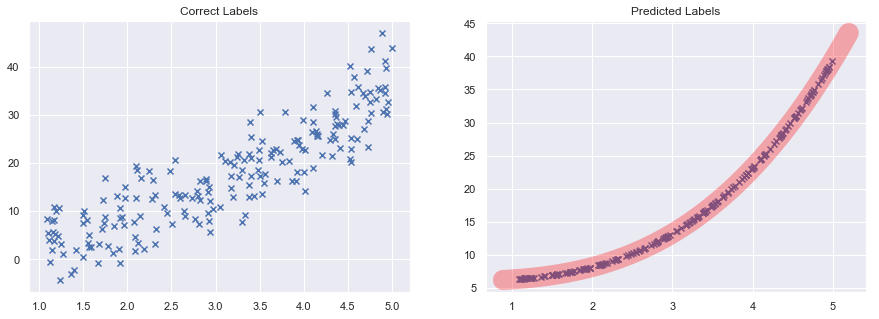

In [8]:
plt.figure(figsize=(15, 5))
pred = best_clf.predict(test_X)
plt.subplot(1, 2, 1)
plt.title('Correct Labels')
plt.scatter(test_X.ravel(), test_y, marker='x')
plt.subplot(1, 2, 2)
plt.title('Predicted Labels')
plt.scatter(test_X.ravel(), pred, marker='x')
plot_regression_line(best_clf, plt.xlim(), plt.ylim())
plt.show()